In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import math 
np.random.seed(2019)
from scipy.stats import skew
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

import statsmodels

#!pip install ml_metrics
from ml_metrics import rmsle

import matplotlib.pyplot as plt
%matplotlib inline
print("done")

done


In [5]:
def read_and_concat_dataset(training_path, test_path):
    train = pd.read_csv('train.csv')
    train['train'] = 1
    test = pd.read_csv('test.csv')
    test['train'] = 0
    data = train.append(test, ignore_index=True)
    return train, test, data

train, test, data = read_and_concat_dataset('train.csv', 'test.csv')
data = data.set_index('Id')

Counting missing values from all columns

In [6]:
data.columns[data.isnull().sum()>0]


Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SalePrice', 'SaleType', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')

Counting number of missing values of one column

In [7]:
  dfObj = pd.DataFrame(train, columns = ['Alley'])

In [8]:
dfObj.isnull().sum().sum()

1369

In [12]:
dfObj.shape

(1460, 1)

In [176]:
print(data.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null int64
BsmtHalfBath     2919 non-null int64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2919 n

In [13]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,train
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,1
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,1
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,1
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,1
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,1


# Fixing Variables

Filling  missing values for varaibles  GarageCond,GarageQual...MiscFeature with none.
Garagecond has NaN values which cannot be considered as null because with no garage it cannot be null rather it is nor available.

In [14]:
def filling_missing_values(data,variable, new_value):
    data[variable] = data[variable].fillna(new_value)

In [15]:
filling_missing_values(data,'GarageCond','None')
filling_missing_values(data,'GarageQual','None')
filling_missing_values(data,'FireplaceQu','None')
filling_missing_values(data,'BsmtCond','None')
filling_missing_values(data,'BsmtQual','None')
filling_missing_values(data,'PoolQC','None')
filling_missing_values(data,'MiscFeature','None')

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
 Since MsSubclass is a ctegorical variable replacing its numerical ids to categorical values.

In [16]:
data['MSSubClass'][data['MSSubClass'] == 20] = '1-STORY 1946 & NEWER ALL STYLES'
data['MSSubClass'][data['MSSubClass'] == 30] = '1-STORY 1945 & OLDER'
data['MSSubClass'][data['MSSubClass'] == 40] = '1-STORY W/FINISHED ATTIC ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 45] = '1-1/2 STORY - UNFINISHED ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 50] = '1-1/2 STORY FINISHED ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 60] = '2-STORY 1946 & NEWER'
data['MSSubClass'][data['MSSubClass'] == 70] = '2-STORY 1945 & OLDER'
data['MSSubClass'][data['MSSubClass'] == 75] = '2-1/2 STORY ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 80] = 'SPLIT OR MULTI-LEVEL'
data['MSSubClass'][data['MSSubClass'] == 85] = 'SPLIT FOYER'
data['MSSubClass'][data['MSSubClass'] == 90] = 'DUPLEX - ALL STYLES AND AGES'
data['MSSubClass'][data['MSSubClass'] == 120] = '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
data['MSSubClass'][data['MSSubClass'] == 150] = '1-1/2 STORY PUD - ALL AGES'
data['MSSubClass'][data['MSSubClass'] == 160] = '2-STORY PUD - 1946 & NEWER'
data['MSSubClass'][data['MSSubClass'] == 180] = 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
data['MSSubClass'][data['MSSubClass'] == 190] = '2 FAMILY CONVERSION - ALL STYLES AND AGES'

A few categorical variables are ordinal variables, so let's fix them.

In [17]:
def fixing_ordinal_variables(data, variable):
    data[variable][data[variable] == 'Ex'] = 5
    data[variable][data[variable] == 'Gd'] = 4
    data[variable][data[variable] == 'TA'] = 3
    data[variable][data[variable] == 'Fa'] = 2
    data[variable][data[variable] == 'Po'] = 1
    data[variable][data[variable] == 'None'] = 0

In [18]:
fixing_ordinal_variables(data,'ExterQual')
fixing_ordinal_variables(data,'ExterCond')
fixing_ordinal_variables(data,'BsmtCond')
fixing_ordinal_variables(data,'BsmtQual')
fixing_ordinal_variables(data,'HeatingQC')
fixing_ordinal_variables(data,'KitchenQual')
fixing_ordinal_variables(data,'FireplaceQu')
fixing_ordinal_variables(data,'GarageQual')
fixing_ordinal_variables(data,'GarageCond')
fixing_ordinal_variables(data,'PoolQC')

In [19]:
data['PavedDrive'][data['PavedDrive'] == 'Y'] = 3
data['PavedDrive'][data['PavedDrive'] == 'P'] = 2
data['PavedDrive'][data['PavedDrive'] == 'N'] = 1

Counting missing values less than 50

In [22]:
colu = data.columns[(data.isnull().sum()<50) & (data.isnull().sum()>0)]
#for i in colu:
print(data[colu].isnull().sum())

BsmtFinSF1       1
BsmtFinSF2       1
BsmtFullBath     2
BsmtHalfBath     2
BsmtUnfSF        1
Electrical       1
Exterior1st      1
Exterior2nd      1
Functional       2
GarageArea       1
GarageCars       1
KitchenQual      1
MSZoning         4
MasVnrArea      23
MasVnrType      24
SaleType         1
TotalBsmtSF      1
Utilities        2
dtype: int64


Counting missing values greater than 50

In [37]:
colu = data.columns[data.isnull().sum()>=50]
#for i in colu:
print(data[colu].isnull().sum())

Alley           2721
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Fence           2348
LotFrontage      486
SalePrice       1459
dtype: int64


In [38]:
filling_missing_values(data, 'GarageArea',0)
filling_missing_values(data, 'GarageCars',0)
data['GarageFinish'][(data.GarageFinish.isnull()==True) & (data.GarageCond==0)] =0
data['GarageType'][(data.GarageType.isnull()==True) & (data.GarageCond==0)] =0
data['GarageYrBlt'][(data.GarageYrBlt.isnull()==True) & (data.GarageCond==0)] =0

I'm gonna put 0 in MiscVal for house which don't have any MiscFeature and 'None' value for house with 0 in MiscValue and some value in MiscFeature.

In [39]:
print(data[['MiscFeature','MiscVal']][(data.MiscFeature=='None') & (data.MiscVal>0)])
data.MiscVal.loc[2550] = 0

print(data[['MiscFeature','MiscVal']][(data.MiscVal==0) & (data.MiscFeature!='None')])
c=data[['MiscFeature','MiscVal']][(data.MiscVal==0) & (data.MiscFeature!='None')].index
data.MiscFeature.loc[c] = 'None'

Empty DataFrame
Columns: [MiscFeature, MiscVal]
Index: []
Empty DataFrame
Columns: [MiscFeature, MiscVal]
Index: []


Output of above code.
MiscFeature  MiscVal
Id                       
2550        None    17000
     MiscFeature  MiscVal
Id                       
874         Othr        0
1201        Shed        0
2432        Shed        0

In [63]:
def inputing(variab):
    y = data[variab]
    #only one varaiable in y
    data2 = data.drop([variab],axis=1)
    #all othger variables except y
    col = data2.columns[data2.isnull().sum()==0]
    # col has all variables names
    data2 = data2[col]
    # data2 now has all values of variables with no missing values
    data2 = pd.get_dummies(data2)
    # data2 now has encoded values
    c_train = y[y.notnull()==True].index
    print(c_train)
    # c_train has all the indexes of variable y with no missing values
    y_train = y[c_train]
    # y_train has all the values of c_train
    columny = data2.columns
    
    X_train = data2[columny].loc[c_train]
    c_test = y[y.notnull()!=True].index
    y_test = y[c_test]
    X_test = data2[columny].loc[c_test]
    #Model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #Filling missing data
    y_pred = pd.Series(y_pred, index=c_test)
    data[variab].loc[c_test] = y_pred.loc[c_test]



In [114]:
def inputing(variab):
    y = data[variab]
    #only one varaiable in y
    data2 = data.drop([variab],axis=1)
    #all othger variables except y
    col = data2.columns[data2.isnull().sum()==0]
    # col has all variables names
    data2 = data2[col]
    # data2 now has all values of variables with no missing values
    data2 = pd.get_dummies(data2)
    # data2 now has encoded values
    #print(data2)
    c_train = y[y.notnull()==True].index
    #print(c_train)
    # c_train has all the indexes of variable y with no missing values
    y_train = y[c_train]
    #print(y_train)
    # y_train has all the values of c_train
    columny = data2.columns
    #print(columny)
    X_train = data2[columny].loc[c_train]
    #print(X_train)
    c_test = y[y.notnull()!=True].index
    print(c_test)
    y_test = y[c_test]
    print(y_test)
    X_test = data2[columny].loc[c_test]

In [137]:
def inputing(variab):
    y = data[variab]
    data2 = data.drop([variab],axis=1)
    col = data2.columns[data2.isnull().sum()==0]
    data2 = data2[col]
    data2 = pd.get_dummies(data2)
    c_train = y[y.notnull()==True].index
    y_train = y[c_train]
    columny = data2.columns
    X_train = data2[columny].loc[c_train]
    c_test = y[y.notnull()!=True].index
    y_test = y[c_test]
    X_test = data2[columny].loc[c_test]
    #Model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #Filling missing data
    y_pred = pd.Series(y_pred, index=c_test)
    data[variab].loc[c_test] = y_pred.loc[c_test]
    
def inputingnum(variab):
    y = data[variab]
    data2 = data.drop([variab],axis=1)
    col = data2.columns[data2.isnull().sum()==0]
    data2 = data2[col]
    data2 = pd.get_dummies(data2)
    c_train = y[y.notnull()==True].index
    y_train = y[c_train]
    columny = data2.columns
    X_train = data2[columny].loc[c_train]
    c_test = y[y.notnull()!=True].index
    y_test = y[c_test]
    X_test = data2[columny].loc[c_test]
    #Model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #Filling missing data
    y_pred = pd.Series(y_pred, index=c_test)
    data[variab].loc[c_test] = y_pred.loc[c_test]

In [138]:
inputing(variab='Electrical')
inputing(variab='Exterior2nd')
inputing(variab='Exterior1st')
inputing(variab='MasVnrType')
inputing(variab='Functional')
inputing(variab='MSZoning')
inputing(variab='SaleType')
inputing(variab='Alley')
inputing(variab='BsmtExposure')
inputing(variab='BsmtFinType1')
inputing(variab='BsmtFinType2')
inputing(variab='Fence')

inputingnum(variab='KitchenQual')
data['KitchenQual'] = data.KitchenQual.astype(int)
inputingnum(variab='BsmtFullBath')
data['BsmtFullBath'] = data.BsmtFullBath.astype(int)
inputingnum(variab='BsmtHalfBath')
data['BsmtHalfBath'] = data.BsmtHalfBath.astype(int)

inputingnum(variab='TotalBsmtSF')
inputingnum(variab='BsmtFinSF1')
inputingnum(variab='BsmtFinSF2')
inputingnum(variab='MasVnrArea')
inputingnum(variab='BsmtUnfSF')
inputingnum(variab='LotFrontage')

In [139]:
print(data['Utilities'].value_counts())
data  = data.drop(['Utilities'],axis=1)

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [140]:
data.columns[data.isnull().sum()>0]

Index(['SalePrice'], dtype='object')

In [141]:
data.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley               0
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1        0
BsmtFinType2        0
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual            0
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence               0
FireplaceQu         0
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            0
MasVnrArea          0
MasVnrType          0
MiscFeature         0
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

In [68]:
tuples = [
    ('cobra', 'mark i'), ('cobra', 'mark ii'),
    ('sidewinder', 'mark i'), ('sidewinder', 'mark ii'),
    ('viper', 'mark ii'), ('viper', 'mark iii')
]
index = pd.MultiIndex.from_tuples(tuples)
values = [[12, 2], [0, 4], [10, 20],
         [1, 4], [7, 1], [16, 36]]
df = pd.DataFrame(values, columns=['max_speed', 'shield'], index=index)
df

max_speed  shield
cobra      mark i           12       2
           mark ii           0       4
sidewinder mark i           10      20
           mark ii           1       4
viper      mark ii           7       1
           mark iii         16      36

In [126]:
data.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LowQualFinSF       int64
MSSubClass        object
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64
MoSold             int64
Neighborhood      object


In [166]:
data3=data['2ndFlrSF']

In [167]:
data3.dtypes


dtype('int64')

In [168]:
data3.head

<bound method NDFrame.head of Id
1        854
2          0
3        866
4        756
5       1053
6        566
7          0
8        983
9        752
10         0
11         0
12      1142
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21      1218
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
        ... 
2890       0
2891     671
2892       0
2893     336
2894     360
2895       0
2896       0
2897       0
2898       0
2899       0
2900       0
2901       0
2902       0
2903       0
2904       0
2905       0
2906       0
2907     688
2908       0
2909       0
2910       0
2911     546
2912       0
2913     546
2914     546
2915     546
2916     546
2917       0
2918       0
2919    1004
Name: 2ndFlrSF, Length: 2919, dtype: int64>

In [131]:
data3.nunique()

2

In [ ]:
data.columns[data.isnull().sum()>0]

In [135]:
data.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual            0
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu         0
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature         0
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea            0
PoolQC    

# Outlier elimination

AxesSubplot(0.125,0.125;0.775x0.755)


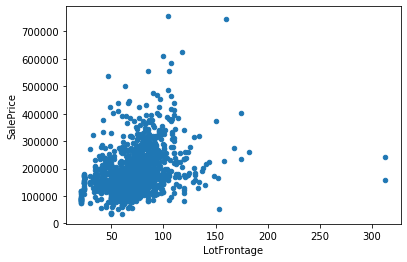

In [142]:
print(data.plot.scatter(x='LotFrontage',y='SalePrice'))

AxesSubplot(0.125,0.125;0.775x0.755)


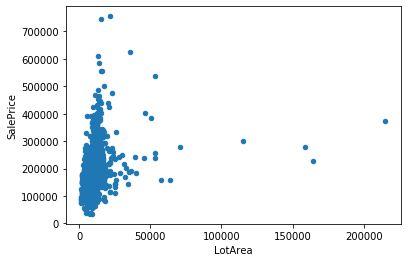

In [143]:
print(data.plot.scatter(x='LotArea',y='SalePrice'))

AxesSubplot(0.125,0.125;0.775x0.755)


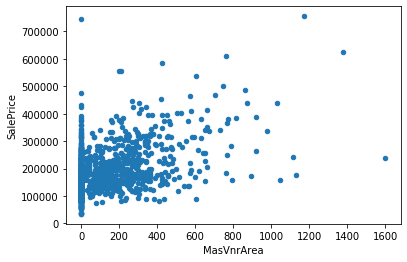

In [144]:
print(data.plot.scatter(x='MasVnrArea',y='SalePrice'))

AxesSubplot(0.125,0.125;0.775x0.755)


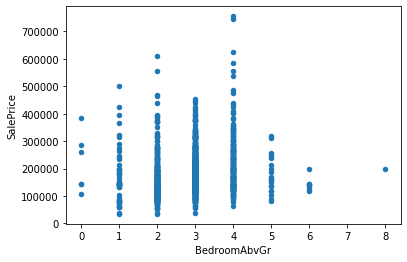

In [145]:
print(data.plot.scatter(x='BedroomAbvGr',y='SalePrice'))

In [164]:
def dropping_outliers(data, condition):
    #put condition with with reference to the data table, use brackets and (& |) operators, remember about you can drop observation only from train dataset
    condition_to_drop = data[condition].index
    data = data.drop(condition_to_drop)
    data4=data['LotFrontage']
    print(data4)

AxesSubplot(0.125,0.125;0.775x0.755)


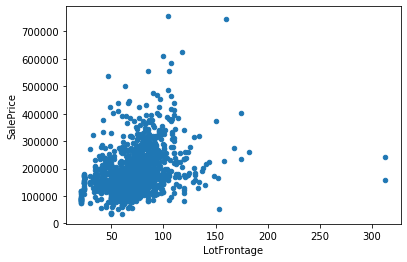

In [158]:
print(data.plot.scatter(x='LotFrontage',y='SalePrice'))

In [165]:
dropping_outliers(data, (data.SalePrice<100000) & (data.train==1) & (data.LotFrontage>150))

Id
1        65.0
2        80.0
3        68.0
4        60.0
5        84.0
6        85.0
7        75.0
8        90.1
9        51.0
10       50.0
11       70.0
12       85.0
13       79.5
14       91.0
15       96.8
16       51.0
17       50.9
18       72.0
19       66.0
20       70.0
21      101.0
22       57.0
23       75.0
24       44.0
25       67.4
26      110.0
27       60.0
28       98.0
29       47.0
30       60.0
        ...  
2890     50.0
2891     75.0
2892     69.0
2893     50.0
2894     60.0
2895     41.0
2896     44.0
2897     69.0
2898     65.0
2899     70.0
2900    140.0
2901    118.0
2902     63.2
2903     95.0
2904     88.0
2905    125.0
2906     78.0
2907     41.0
2908     58.0
2909     98.6
2910     21.0
2911     21.0
2912     80.0
2913     21.0
2914     21.0
2915     21.0
2916     21.0
2917    160.0
2918     62.0
2919     74.0
Name: LotFrontage, Length: 2918, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


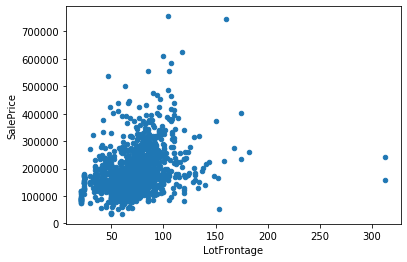

In [156]:
print(data.plot.scatter(x='LotFrontage',y='SalePrice'))

In [163]:
dropping_outliers(data, (data.LotFrontage>100) & (data.train==1))

Id
1        65.0
2        80.0
3        68.0
4        60.0
5        84.0
6        85.0
7        75.0
8        90.1
9        51.0
10       50.0
11       70.0
12       85.0
13       79.5
14       91.0
15       96.8
16       51.0
17       50.9
18       72.0
19       66.0
20       70.0
22       57.0
23       75.0
24       44.0
25       67.4
27       60.0
28       98.0
29       47.0
30       60.0
31       50.0
32       64.0
        ...  
2890     50.0
2891     75.0
2892     69.0
2893     50.0
2894     60.0
2895     41.0
2896     44.0
2897     69.0
2898     65.0
2899     70.0
2900    140.0
2901    118.0
2902     63.2
2903     95.0
2904     88.0
2905    125.0
2906     78.0
2907     41.0
2908     58.0
2909     98.6
2910     21.0
2911     21.0
2912     80.0
2913     21.0
2914     21.0
2915     21.0
2916     21.0
2917    160.0
2918     62.0
2919     74.0
Name: LotFrontage, Length: 2807, dtype: float64


In [173]:
data['2ndFloor'] = pd.Series(np.where(data['2ndFlrSF'].values == 0, 0, 1),data.index)

In [170]:
print(data['2ndFloor'])

Id
1       1
2       0
3       1
4       1
5       1
6       1
7       0
8       1
9       1
10      0
11      0
12      1
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
       ..
2890    0
2891    1
2892    0
2893    1
2894    1
2895    0
2896    0
2897    0
2898    0
2899    0
2900    0
2901    0
2902    0
2903    0
2904    0
2905    0
2906    0
2907    1
2908    0
2909    0
2910    0
2911    1
2912    0
2913    1
2914    1
2915    1
2916    1
2917    0
2918    0
2919    1
Name: 2ndFloor, Length: 2919, dtype: int64


In [171]:
data3.head

<bound method NDFrame.head of Id
1        854
2          0
3        866
4        756
5       1053
6        566
7          0
8        983
9        752
10         0
11         0
12      1142
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21      1218
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
        ... 
2890       0
2891     671
2892       0
2893     336
2894     360
2895       0
2896       0
2897       0
2898       0
2899       0
2900       0
2901       0
2902       0
2903       0
2904       0
2905       0
2906       0
2907     688
2908       0
2909       0
2910       0
2911     546
2912       0
2913     546
2914     546
2915     546
2916     546
2917       0
2918       0
2919    1004
Name: 2ndFlrSF, Length: 2919, dtype: int64>

In [179]:
Results = pd.DataFrame({'Model': [],'RMSLE': []})

In [180]:
data = pd.get_dummies(data)

In [181]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(data[data.SalePrice.isnull()==False].drop('SalePrice',axis=1),data.SalePrice[data.SalePrice.isnull()==False],test_size=0.30, random_state=2019)
trainY = np.log(trainY)

In [186]:
print(trainX.shape)

(1022, 309)


In [187]:
print(data.shape)

(2919, 310)


In [207]:
from xgboost.sklearn import XGBRegressor

model = XGBRegressor(learning_rate=0.001,n_estimators=4600,
                                max_depth=7, min_child_weight=0,
                                gamma=0, subsample=0.7,
                                colsample_bytree=0.7,
                                scale_pos_weight=1, seed=27,
                                reg_alpha=0.00006)
model.fit(trainX,trainY)
y_pred = model.predict(testX)
y_pred = np.exp(y_pred)

res = pd.DataFrame({"Model":['XGBoost'],
                    "RMSLE": [rmsle(testY, y_pred)]})
Results = Results.append(res)

[18:19:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [208]:
Results

,Model,RMSLE
0,XGBoost,0.179219
0,XGBoost,0.179219
0,XGBoost,0.179219
0,XGBoost,0.179219
0,XGBoost,0.179219
0,XGBoost,0.179219


In [212]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=6)
model.fit(trainX,trainY)
y_pred = model.predict(testX)
y_pred = np.exp(y_pred)

print(rmsle(testY, y_pred))

res = pd.DataFrame({"Model":['Decision Tree'],
                    "RMSLE": [rmsle(testY, y_pred)]})
Results = Results.append(res)

0.21110157608927585


In [213]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1500,
                                max_depth=6)
model.fit(trainX,trainY)
y_pred = model.predict(testX)
y_pred = np.exp(y_pred)
print(rmsle(testY, y_pred))

res = pd.DataFrame({"Model":['Random Forest'],
                    "RMSLE": [rmsle(testY, y_pred)]})
Results = Results.append(res)

0.16047354916780143


In [214]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.0005)

model.fit(trainX,trainY)
y_pred = model.predict(testX)
y_pred = np.exp(y_pred)
print(rmsle(testY, y_pred))

res = pd.DataFrame({"Model":['LASSO'],
                    "RMSLE": [rmsle(testY, y_pred)]})
Results = Results.append(res)

0.12287380975713194


In [217]:
train_score001=model.score(trainX,trainY)
test_score001=model.score(testX,testY)
coeff_used001 = np.sum(model.coef_!=0)

In [218]:
print ("training score for alpha=0.0001:", train_score001 )
print ("test score for alpha =0.0001: ", test_score001)
print ("number of features used: for alpha =0.0001:", coeff_used001)

training score for alpha=0.0001: 0.9379015009544311
test score for alpha =0.0001:  -6.293208696527553
number of features used: for alpha =0.0001: 121


In [220]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.0005)

model.fit(trainX,trainY)
y_pred = model.predict(testX)
y_pred = np.exp(y_pred)
print(rmsle(testY, y_pred))

res = pd.DataFrame({"Model":['Ridge'],
                    "RMSLE": [rmsle(testY, y_pred)]})
Results = Results.append(res)

0.14449963824310105


In [221]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0)

model.fit(trainX,trainY)
y_pred = model.predict(testX)
y_pred = np.exp(y_pred)
print(rmsle(testY, y_pred))

res = pd.DataFrame({"Model":['Linear Regression'],
                    "RMSLE": [rmsle(testY, y_pred)]})
Results = Results.append(res)

0.13989786825618222


In [222]:
import statsmodels.api as sm

X2 = sm.add_constant(trainX)
o=0
for i in X2.columns:
    o+=1
    print(o)
    model = sm.OLS(trainY, X2.astype(float))
    model = model.fit()
    p_values = pd.DataFrame(model.pvalues)
    p_values = p_values.sort_values(by=0, ascending=False)
    if float(p_values.loc[p_values.index[0]])>=0.05:
        X2=X2.drop(p_values.index[0],axis=1)
    else:
        break

kolumny = X2.columns
testX2 = sm.add_constant(testX)
testX2 = testX2[kolumny]

y_pred = model.predict(testX2)
y_pred = np.exp(y_pred)


res = pd.DataFrame({"Model":['Stepwise Regression'],
                    "RMSLE": [rmsle(testY, y_pred)]})
Results = Results.append(res)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
